In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/bestsellers with categories.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [4]:
data.nunique()

Name           351
Author         248
User Rating     14
Reviews        346
Price           40
Year            11
Genre            2
dtype: int64

In [5]:
data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [6]:
data.describe(include='all')

,Name,Author,User Rating,Reviews,Price,Year,Genre
count,550,550,550.000000,550.000000,550.000000,550.000000,550
unique,351,248,NaN,NaN,NaN,NaN,2
top,Publication Manual of the American Psychologic...,Jeff Kinney,NaN,NaN,NaN,NaN,Non Fiction
freq,10,12,NaN,NaN,NaN,NaN,310
mean,NaN,NaN,4.618364,11953.281818,13.100000,2014.000000,NaN
std,NaN,NaN,0.226980,11731.132017,10.842262,3.165156,NaN
min,NaN,NaN,3.300000,37.000000,0.000000,2009.000000,NaN
25%,NaN,NaN,4.500000,4058.000000,7.000000,2011.000000,NaN
50%,NaN,NaN,4.700000,8580.000000,11.000000,2014.000000,NaN
75%,NaN,NaN,4.800000,17253.250000,16.000000,2017.000000,NaN


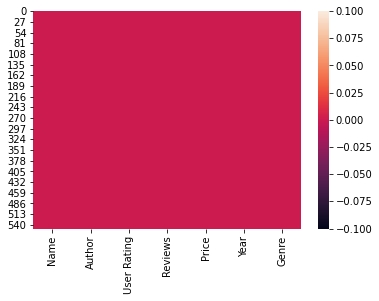

In [7]:
#checking missing values
sns.heatmap(data=data.isnull())

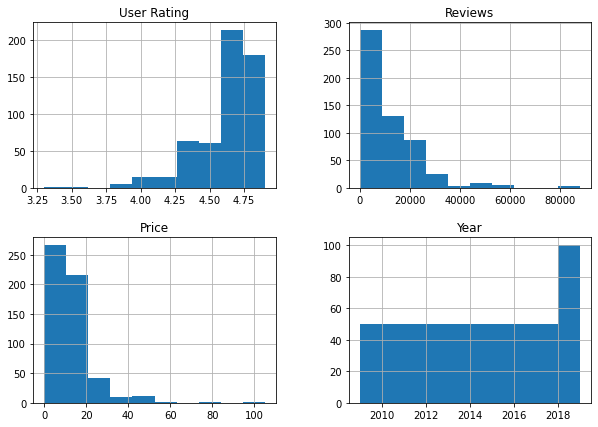

In [9]:
data.hist(figsize=(10,7))
plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder 

le = LabelEncoder() 
data['Genre']= le.fit_transform(data['Genre']) 

In [11]:
data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,1
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,0
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,1
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,0
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,1


In [13]:
X= data.drop(['Name','Author','Genre'], axis=1)
y=  data['Genre']

In [14]:
X

,User Rating,Reviews,Price,Year
0,4.7,17350,8,2016
1,4.6,2052,22,2011
2,4.7,18979,15,2018
3,4.7,21424,6,2017
4,4.8,7665,12,2019
...,...,...,...,...
545,4.9,9413,8,2019
546,4.7,14331,8,2016
547,4.7,14331,8,2017
548,4.7,14331,8,2018


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDRegressor,SGDClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor,XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, roc_curve, roc_auc_score, r2_score, mean_squared_error
from sklearn import metrics
from sklearn.discriminant_analysis  import LinearDiscriminantAnalysis

models = {
    "Linear Regression": LinearRegression(fit_intercept=True),
    "KNN": KNeighborsClassifier(),
    "SVC" :SVC(),
    "XGbr":XGBClassifier(),
    "SGD": SGDClassifier(),
    "Decisiontree": DecisionTreeClassifier(),
    "RandomF": RandomForestClassifier(),
    "LogisticRegression": LogisticRegression()
}

for model in models.items():
    m = model[1]
    m.fit(X_train, y_train)
    print(model[0])
    print("Score: ", m.score(X_test,y_test))
    print("")

Linear Regression
Score:  0.04689495748663619

KNN
Score:  0.7272727272727273

SVC
Score:  0.6363636363636364

XGbr
Score:  0.7818181818181819

SGD
Score:  0.6272727272727273

Decisiontree
Score:  0.7181818181818181

RandomF
Score:  0.7818181818181819

LogisticRegression
Score:  0.6



We Can see Randm Forest and XGbr has same accuracy and highest accuracy.